IMPORT LIBRARY YANG DIBUTUHKAN

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns
sns.set()
print ("Done Importing")

Done Importing


IMPORT DATA LATIH DAN DATA UJI

In [32]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

MEMISAHKAN FITUR DAN TARGET

In [33]:
X_train=train.drop('Outcome', axis=1)
y_train=train['Outcome']

X_test=test.drop('Outcome', axis=1)
y_test=test['Outcome']

SCALING DATA DENGAN STANDARD SCALER

In [34]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

MENGUBAH DATA ARRAY MENJADI DATAFRAME

In [35]:
X_train = pd.DataFrame(X_train, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [36]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.027183,1.863344,1.513592,-0.290029,-0.585300,0.466955,-0.603906,0.382185
1,-0.072208,-1.372628,1.199536,-1.223009,-0.788544,-0.815249,-0.627361,-0.859916
2,1.519417,0.098269,1.356564,0.642952,-0.432867,0.751890,-0.501291,1.719833
3,-0.390533,-0.882329,-0.213719,-1.502903,-0.932508,-1.727039,0.372402,-0.477731
4,-0.072208,-1.405314,0.885479,0.176461,-0.754670,0.139281,2.263448,-0.382185
...,...,...,...,...,...,...,...,...
308,-0.708858,0.425134,0.257366,1.949124,0.380108,0.595176,-0.354698,-0.668824
309,-1.027183,1.765284,-0.841832,-0.010135,2.700475,0.196268,1.618440,-0.955463
310,-1.027183,-0.195911,-0.370747,0.176461,0.244612,-0.345107,-0.079104,-0.859916
311,-0.072208,0.000209,2.298734,0.549654,0.684974,3.430272,1.055524,-0.859916


In [37]:
X_test = pd.DataFrame(X_test, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [38]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.201092,-0.686209,0.257366,1.016144,-0.458273,0.566682,-0.926410,1.337648
1,-1.027183,0.130955,0.728451,0.736250,0.430919,0.438462,0.832703,-0.764370
2,0.246117,-1.241881,-0.998861,-0.663221,-0.932508,-0.772509,-0.627361,-0.286639
3,-1.027183,1.274986,0.414394,2.508913,-0.500615,2.846157,0.700770,-0.573278
4,-1.027183,1.896031,1.356564,1.389336,2.971467,1.435732,-0.873637,-0.477731
...,...,...,...,...,...,...,...,...
74,0.246117,-0.424717,0.414394,-0.849817,-0.500615,-0.687028,-1.178550,-0.382185
75,0.882767,0.359761,-0.056691,-0.569923,-0.246560,0.310242,0.064557,-0.191093
76,-0.072208,-1.601434,-0.213719,-0.103433,-0.966382,-0.501821,-0.665475,-0.764370
77,-0.390533,2.419016,-0.056691,1.482634,3.250927,-0.387847,-1.061275,2.102018


MENGUBAH TARGET DENGAN NILAI 0 MENJADI -1 (KEPERLUAN ALGORITMA SVM MANUAL YANG DIGUNAKAN)

In [39]:
y_train=y_train.replace(0,-1)
y_test=y_test.replace(0,-1)

In [40]:
y_train

0      1
1     -1
2     -1
3     -1
4      1
      ..
308   -1
309    1
310   -1
311   -1
312    1
Name: Outcome, Length: 313, dtype: int64

ESTIMATOR SFS MENGGUNAKAN SVC DARI SCIKIT LEARN

In [41]:
clf=SVC(kernel='linear')

MENENTUKAN JUMLAH FITUR AKHIR YANG DIHASILKAN OLEH SFS

In [42]:
sfs = SequentialFeatureSelector(clf, n_features_to_select=2)

PROSES SFS

In [43]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=SVC(kernel='linear'),
                          n_features_to_select=2)

MELIHAT FITUR YANG DIPILIH, TRUE ADALAH FITUR YANG DIPILIH, FALSE ADALAH FITUR YANG DIHAPUS

In [44]:
sfs.get_support()

array([False,  True, False, False, False, False, False,  True])

TRANSFORM DATA LATIH DAN DATA UJI

In [45]:
X_train=sfs.transform(X_train)

In [46]:
X_test=sfs.transform(X_test)

MENGUBAH ARRAY MENJADI DATAFRAME

In [47]:
X_testdf = pd.DataFrame(X_test, columns=['Glucose','Age'])

In [48]:
X_traindf = pd.DataFrame(X_train, columns=['Glucose','Age'])

In [49]:
X_traindf

,Glucose,Age
0,1.863344,0.382185
1,-1.372628,-0.859916
2,0.098269,1.719833
3,-0.882329,-0.477731
4,-1.405314,-0.382185
...,...,...
308,0.425134,-0.668824
309,1.765284,-0.955463
310,-0.195911,-0.859916
311,0.000209,-0.859916


In [50]:
X_testdf

,Glucose,Age
0,-0.686209,1.337648
1,0.130955,-0.764370
2,-1.241881,-0.286639
3,1.274986,-0.573278
4,1.896031,-0.477731
...,...,...
74,-0.424717,-0.382185
75,0.359761,-0.191093
76,-1.601434,-0.764370
77,2.419016,2.102018


PROSES PELATIHAN SVM

In [51]:
lr = 0.001
lambda_param = 0.01
n_iters = 1000

In [52]:
n_samples, n_features = X_train.shape
y_ = np.where(y_train <= 0, -1, 1)
print(n_samples)
print(n_features)
print(y_)

313
2
[ 1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1
 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1  1
 -1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1
 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1
  1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1
  1]


In [53]:
w = np.zeros(n_features)
b = 0
print(w)
print(b)

[0. 0.]
0


In [54]:
for _ in range(n_iters):
            for idx, x_i in enumerate(X_train):
                condition = y_[idx] * (np.dot(x_i, w) - b) >= 1
                if condition:
                    w -= lr * (2 * lambda_param * w)
                else:
                    w -= lr * (2 * lambda_param * w - np.dot(x_i, y_[idx]))
                    b -= lr * y_[idx]

In [55]:
print(w)

[0.93693972 0.41374833]


In [56]:
print(b)

0.6450000000000005


PROSES PENGUJIAN SVM

In [57]:
approx = np.dot(X_test, w) - b
np.sign(approx)

array([-1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,
        1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
        1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1.,
        1.])

In [58]:
y_pred = np.sign(approx)

MELIHAT HASIL MELALUI CONFUSION MATRIX

Text(0.5, 20.049999999999997, 'Predicted label')

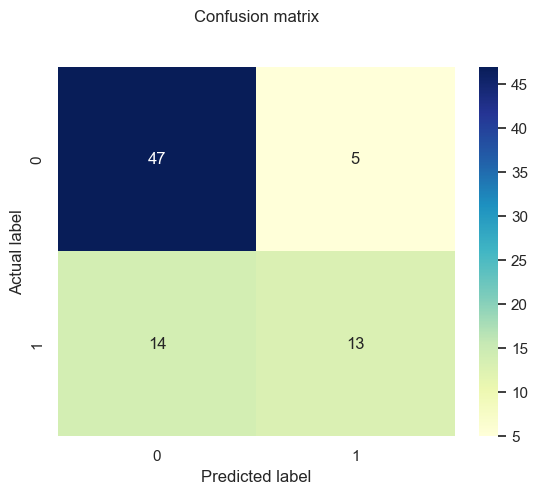

In [59]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
tp=cnf_matrix[0,0]
tn=cnf_matrix[1,1]
fp=cnf_matrix[0,1]
fn=cnf_matrix[1,0]
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

MENGHITUNG METRIKS EVALUASI

In [60]:
akurasi= ((tp+tn)/(tp+tn+fp+fn)) * 100
presisi= (tp/(fp+tp)) * 100
recall= (tp/(tp+fn)) * 100
specificity= (tn/(tn+fp)) * 100
f1score= ((2*presisi*recall)/(presisi+recall))

In [61]:
print(f'Akurasi: {akurasi:.2f}%')
print(f'Presisi: {presisi:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'Specificity: {specificity:.2f}%')
print(f'F1-Score: {f1score:.2f}%')

Akurasi: 75.95%
Presisi: 90.38%
Recall: 77.05%
Specificity: 72.22%
F1-Score: 83.19%
